# Results

### Imports

In [1]:
import pandas as pd
import classes_and_methods.soam_class as soam #contains a text cleaning method
import classes_and_methods.title_data_augmenter_class as augment
import matplotlib.pyplot as plt

1068 lines from "Augement_Equipment_OPT" file downloaded for supplement
"Augement_NOCTILUCENT_CLOUDS_Wiki" string downloaded for supplement
89 lines from "Augement_NOCTILUCENT_CLOUDS_GPT" file downloaded for supplement
73 lines from "Augement_NORTHERN_LIGHTS_GPT" file downloaded for supplement


### Helper Methods

In [2]:
#Helper Methods
def category_counts(df, cat_col, print_it = True):
    """
    Provided a data frame, df, and a category column name, cat_col...
        Print a table showing the categories and their corresponding:
            -Category name
            -Category record count
            -Percentage across all categories
    """
    # Get the value counts and create a DataFrame
    table = pd.DataFrame(df[cat_col].value_counts()).reset_index()
    # Rename the columns for clarity
    table.columns = ['Subject', 'Count']
    #set percentages column
    total = sum(table['Count'])
    table['Percentages'] = table['Count']/total
    if(print_it):
        # Display the table
        print("Table of subject_type Counts:")
        print(table)
        print(f'TOTAL = {total}')
    
    return table

def original_data_percentages(df,original_data_tag,data_type_col, sub_category_col):
    """
    df, the working data frame containing a data_type col with a type tag for original data for each occurance row
    original_data_tag, a string matching the original data type tag
    data_type_col, a string matching the column name holding the data types
    sub_category_col, a string matching the column name holding subject types
    """
    #Group by and calculate the percentage of the original data taged
    result_df = df.groupby(sub_category_col)[data_type_col].value_counts(
        normalize=True).unstack().fillna(0) * 100
    
    return result_df[original_data_tag].sort_values(ascending=False)

def two_category_histogram(category1, category2, df, print_it = False):
    """
    Where:
        - string category1 counts will be represented as a single bar
        - string ategory2 counts within category1 will be represented by 
            color on the corresponding category1 bar
        - string total_counts is a column containing counts of occurance within both categories
        - df is a data frame with category1 and category2 two columns
    """
    df = df.groupby([category1, category2]).size().reset_index(name='count')
    # Create a cross-tabulation (count) of Category1 and Category2
    
    cross_tab = df.pivot_table(index=category1, columns=category2, values='count', aggfunc='sum')

    # Sort the DataFrame based on the counts of Category1 in descending order
    sorted_cross_tab = cross_tab.sum(axis=1).sort_values(ascending=False)
    cross_tab_sorted = cross_tab.loc[sorted_cross_tab.index]

    # Plot the histogram-like graph
    ax = cross_tab_sorted.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
    
    # Set the y-axis limit to be 20% greater than the second largest subject type
    y_limit = 1.2 * sorted_cross_tab.iloc[1]
    plt.ylim(0, y_limit)

    # Annotate bars that exceed the y-axis limit
    for i, (idx, row) in enumerate(cross_tab_sorted.iterrows()):
        if row.sum() > y_limit:
            ax.annotate(f'** / / **', xy=(i, y_limit), ha='center', va='bottom', color='red')
        
    # Customize the plot
    ax.set_xlabel(category1.upper())
    ax.set_ylabel('Count')
    ax.legend(title = category2.upper(), bbox_to_anchor=(1, 1))
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    
    # Tilt x-axis tick labels at a 45-degree angle
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
    
    if print_it == True:
        # Show the plot
        print("PLOTTING CATEGORIES")
        plt.show()
    
    return(plt)

print("helper methods ready")

helper methods ready


### Loading Data

In [3]:
# Data Load (provided by Salvatore from AstroBin site)
df = pd.read_csv("data/astrobin_titles_to_subject_types.csv") #the main starting data frame
#set data types
df['subject_type'] = df['subject_type'].astype('category') #subject_type is our pre-defined categories
df['title'] = df['title'].astype(str) #title is our text data
#data set cleaning
df = df.dropna(how='all') #droping only the rows with 'na' across ALL columns
df = df.dropna(subset=['title']) #droping only the rows with 'na' ONLY in title column
df = df[df['title'] != 'nan'] #droping only the rows with 'nan' ONLY in title column
df = df[~df['title'].str.isspace()] #droping only the rows with just '  ' (white space) as title
df = df[df['title']!=''] #droping only the rows with just '' (dead space) as title
df = df.dropna(subset=['subject_type']) #droping only the rows with 'na' subject_type                                                
#cleaning out the odd '600' category, converting it to 'OTHER' (per email "Image Title Classification | AstroBin")
df['subject_type'] = df['subject_type'].replace('600','OTHER')
#title cleaning (text cleaning method can be reviewed in the appendix, referenced in imports)
df['cleaned_title'] = df['title'].apply(soam.provided_cleaning_method)

#Review the Original df
print(" -- Data loaded --")

#scale back data if testing ###########################################
sample_size = False #100000 ### set to False for full size ###
if sample_size:
    df = df.sample(n=sample_size)
#######################################################################    
df

 -- Data loaded --


,title,subject_type,solar_system_main_subject,cleaned_title
1,Zigarren Galaxie,DEEP_SKY,NaN,zigarren galaxie
2,M 16,DEEP_SKY,NaN,m 16
3,M71 - Ammasso globulare - Costellazione della ...,DEEP_SKY,NaN,m 71 ammasso globulare costellazione della fre...
4,NGC2903 A bright Galaxy in Leo,DEEP_SKY,NaN,ngc 2903 a bright galaxy in leo
5,Omicron1 Cygni Region,DEEP_SKY,NaN,omicron 1 cygni region
...,...,...,...,...
600263,"IC 1318, take 2",DEEP_SKY,NaN,ic 1318 take 2
600264,M33,DEEP_SKY,NaN,m 33
600265,M109 - 100% crop,DEEP_SKY,NaN,m 109 100 crop
600266,NGC663 and NGC457 in Cassiopeia,DEEP_SKY,NaN,ngc 663 and ngc 457 in cassiopeia


# EXPORT / IMPORT

In [4]:
import joblib

In [5]:
# IMPORT --- Load the model from the file
imported_model = joblib.load('./data/full_model.joblib')

#TEST the import
new_text = ["A mountain sky with a comet",
            "Milky Way in the Mountains",
            "Pluto the Dog!", 
            "Pluto the Planet!",
            "The CPC1100 Ready... To... Go!"
           ]
cleaned_text = [soam.provided_cleaning_method(text) for text in new_text]

predicted_scores = imported_model.decision_function(cleaned_text)

top_categories = []
for scores in predicted_scores:
    temp_dict = dict(zip(scores,imported_model.classes_))
    # Get the top N largest scores
    n = 3
    top_scores = sorted(temp_dict.keys(), reverse=True)[:n]
    # Retrieve the categorys corresponding to the top scores
    top_values = [temp_dict[key] for key in top_scores]
    top_categories.append(top_values)
    
dict(zip(new_text,top_categories)) #good Test

{'A mountain sky with a comet': ['WIDE_FIELD', 'OTHER', 'NOCTILUCENT_CLOUDS'],
 'Milky Way in the Mountains': ['WIDE_FIELD', 'OTHER', 'DEEP_SKY'],
 'Pluto the Dog!': ['SOLAR_SYSTEM', 'OTHER', 'GEAR'],
 'Pluto the Planet!': ['SOLAR_SYSTEM', 'STAR_TRAILS', 'OTHER'],
 'The CPC1100 Ready... To... Go!': ['GEAR', 'STAR_TRAILS', 'WIDE_FIELD']}

In [6]:
# HELPER METHODS
def subject_type_predictions(new_text, top_n, cleaning_method, imported_model, values_only = False):

    cleaned_text = [cleaning_method(text) for text in new_text]

    predicted_scores = imported_model.decision_function(cleaned_text)

    top_categories = []
    for scores in predicted_scores:
        temp_dict = dict(zip(scores,imported_model.classes_))
        # Get the top N largest scores
        n = top_n
        top_scores = sorted(temp_dict.keys(), reverse=True)[:n]
        # Retrieve the categorys corresponding to the top scores
        top_values = [temp_dict[key] for key in top_scores]
        top_categories.append(top_values)

    if values_only:
        return top_categories
    else:
        return dict(zip(new_text,top_categories))
    
#TEST -------------------------------------------------------------------
new_text = ["A mountain sky with a comet",
            "Milky Way in the Mountains",
            "Pluto the Dog!", 
            "Pluto the Planet!",
            "The CPC1100 Ready... To... Go!"
           ]
subject_type_predictions(new_text = new_text,
                         top_n = 4, 
                         cleaning_method = soam.provided_cleaning_method, 
                         imported_model = imported_model,
                         values_only = True
                        )

[['WIDE_FIELD', 'OTHER', 'NOCTILUCENT_CLOUDS', 'DEEP_SKY'],
 ['WIDE_FIELD', 'OTHER', 'DEEP_SKY', 'SOLAR_SYSTEM'],
 ['SOLAR_SYSTEM', 'OTHER', 'GEAR', 'DEEP_SKY'],
 ['SOLAR_SYSTEM', 'STAR_TRAILS', 'OTHER', 'WIDE_FIELD'],
 ['GEAR', 'STAR_TRAILS', 'WIDE_FIELD', 'DEEP_SKY']]

In [7]:
#TEST -------------------------------------------------------------------
top_predictions = subject_type_predictions(new_text = new_text,
                         top_n = 1, 
                         cleaning_method = soam.provided_cleaning_method, 
                         imported_model = imported_model,
                         values_only = True
                        )
[x[0] for x in top_predictions]

['WIDE_FIELD', 'WIDE_FIELD', 'SOLAR_SYSTEM', 'SOLAR_SYSTEM', 'GEAR']

In [8]:
df

,title,subject_type,solar_system_main_subject,cleaned_title
1,Zigarren Galaxie,DEEP_SKY,NaN,zigarren galaxie
2,M 16,DEEP_SKY,NaN,m 16
3,M71 - Ammasso globulare - Costellazione della ...,DEEP_SKY,NaN,m 71 ammasso globulare costellazione della fre...
4,NGC2903 A bright Galaxy in Leo,DEEP_SKY,NaN,ngc 2903 a bright galaxy in leo
5,Omicron1 Cygni Region,DEEP_SKY,NaN,omicron 1 cygni region
...,...,...,...,...
600263,"IC 1318, take 2",DEEP_SKY,NaN,ic 1318 take 2
600264,M33,DEEP_SKY,NaN,m 33
600265,M109 - 100% crop,DEEP_SKY,NaN,m 109 100 crop
600266,NGC663 and NGC457 in Cassiopeia,DEEP_SKY,NaN,ngc 663 and ngc 457 in cassiopeia


In [9]:
top_predictions = subject_type_predictions(new_text = df['title'],
                         top_n = 1, 
                         cleaning_method = soam.provided_cleaning_method, 
                         imported_model = imported_model,
                         values_only = True
                        )
df['predicted_subject_types'] = [x[0] for x in top_predictions]
df

,title,subject_type,solar_system_main_subject,cleaned_title,predicted_subject_types
1,Zigarren Galaxie,DEEP_SKY,NaN,zigarren galaxie,DEEP_SKY
2,M 16,DEEP_SKY,NaN,m 16,DEEP_SKY
3,M71 - Ammasso globulare - Costellazione della ...,DEEP_SKY,NaN,m 71 ammasso globulare costellazione della fre...,DEEP_SKY
4,NGC2903 A bright Galaxy in Leo,DEEP_SKY,NaN,ngc 2903 a bright galaxy in leo,DEEP_SKY
5,Omicron1 Cygni Region,DEEP_SKY,NaN,omicron 1 cygni region,DEEP_SKY
...,...,...,...,...,...
600263,"IC 1318, take 2",DEEP_SKY,NaN,ic 1318 take 2,OTHER
600264,M33,DEEP_SKY,NaN,m 33,DEEP_SKY
600265,M109 - 100% crop,DEEP_SKY,NaN,m 109 100 crop,DEEP_SKY
600266,NGC663 and NGC457 in Cassiopeia,DEEP_SKY,NaN,ngc 663 and ngc 457 in cassiopeia,DEEP_SKY


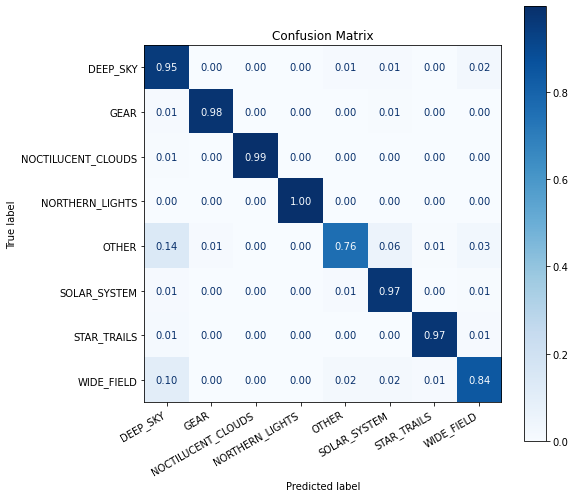

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt

df_sample = df #df.sample(n=15000, random_state=333)

# 'y_true' is the column of real categorical values
# 'y_pred' is the column of predicted categorical values
y_true = df_sample['subject_type'].astype(str)  # Convert to string if not already
y_pred = df_sample['predicted_subject_types'].astype(str)

# Get unique labels for both true and predicted values
unique_labels = sorted(set(y_true.unique()) | set(y_pred.unique()))

# Create a confusion matrix with string labels
conf_matrix = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Normalize the confusion matrix
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, labels=unique_labels, average=None)
normalized_conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)  # Normalize along the true class axis

# Display the confusion matrix with string labels
#disp = ConfusionMatrixDisplay(conf_matrix, display_labels=unique_labels)
#disp.plot(cmap='Blues', values_format='d')

# Display the normalized confusion matrix with string labels
disp = ConfusionMatrixDisplay(normalized_conf_matrix, display_labels=unique_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='.2f', ax=ax)  # Display values as floats with 2 decimal places



# Rotate column labels by 30 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.title("Confusion Matrix")
plt.show()


In [14]:
imported_model

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier',
                 LinearSVC(C=1, class_weight='balanced', dual=False,
                           penalty='l1', random_state=333, tol=0.1))])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LinearSVC Decision Boundary')
plt.show()


NameError: name 'X' is not defined

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'y_true' is the column of real values and 'y_pred' is the column of predicted values in your DataFrame
y_true = df['real_values']
y_pred = df['predicted_values']

# Create a confusion matrix without explicitly defining class labels
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()


KeyError: 'real_values'

### TESTING BLOCKS

In [ ]:
crashme